## Graph Visualization

In [1]:
import json
import queue
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from biobert_embedding.embedding import BiobertEmbedding
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import re
from nltk.corpus import stopwords
from scipy.spatial import distance

In [2]:
name_path = 'C:/Users/NN/Downloads/Graphine/dataset/agro/name.txt'
def_path = 'C:/Users/NN/Downloads/Graphine/dataset/agro/def.txt'
json_path = 'C:/Users/NN/Downloads/Graphine/dataset/agro/graph.json'

In [3]:
lines = []
name_dict, name_dict_index = {}, {}
with open(name_path) as f:
    lines = f.readlines()

count = 0
for line in lines:
    name_dict[line.replace("\n","")] = count
    name_dict_index[count] = line.replace("\n","")
    count += 1
    
name_dict

{'tillage process': 0,
 'land levelling process': 1,
 'crop residue management process': 2,
 'irrigation process': 3,
 'desuckering process': 4,
 'irrigation water source role': 5,
 'irrigation source': 6,
 'irrigation water quantity': 7,
 'conventional tillage process': 8,
 'reduced tillage process': 9,
 'conservation tillage process': 10,
 'laser land levelling process': 11,
 'mechanical pest control process': 12,
 'biological pest control process': 13,
 'pest control process': 14,
 'chemical pest control process': 15,
 'harvesting process': 16,
 'no - till': 17,
 'pruning process': 18,
 'puddling process': 19,
 'mulch - till': 20,
 'ridge - till': 21,
 'strip - till': 22,
 'plant reproductive material': 23,
 'organic fertilizer role': 24,
 'pest role': 25,
 'application method': 26,
 'aerial application': 27,
 'band application': 28,
 'side dressing': 29,
 'broadcast application method': 30,
 'fertilizer basal application': 31,
 'top dressing': 32,
 'chemical basal application': 33,

In [4]:
definitions = []
with open(def_path) as f:
    lines = f.readlines()

for index, line in enumerate(lines):
    line = re.sub(r'[^A-Za-z ]+', '', line.lower())
    line = line.replace("  "," ")
    definitions.append(line.strip() + " " + name_dict_index[index])
    
print(len(definitions))
definitions[:4]

1734


['a planned process in which soil is mechanicaly mixed  stirred or overturned tillage process',
 'a planned process in which the agricultural field surface is shaped for ensuring that the depths and discharge variations over the agricultural field are relatively uniform land levelling process',
 'a planned process in which the thickness of crop residue on the surface of an agricultural field is managed crop residue management process',
 'a planned process in which water is artificially supplied to plant or soil to sustain plants irrigation process']

In [5]:
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('all')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
#definitions = [re.sub(r'[^A-Za-z0-9 ]+', '', s.lower()) for s in definitions]
definitions = [" ".join([lemmatizer.lemmatize(w) for w in defi.split() if w not in stop_words]) for defi in definitions]
definitions[:4]

['planned process soil mechanicaly mixed stirred overturned tillage process',
 'planned process agricultural field surface shaped ensuring depth discharge variation agricultural field relatively uniform land levelling process',
 'planned process thickness crop residue surface agricultural field managed crop residue management process',
 'planned process water artificially supplied plant soil sustain plant irrigation process']

In [6]:
import collections
import pandas as pd
all_def = " ".join(definitions)
word_count = collections.defaultdict(int)
for word in all_def.split():
    word_count[word] += 1
word_count_df = pd.DataFrame(word_count.items())
word_count_df.sort_values(by = 1, ascending = False, inplace = True)
stop_word_new = word_count_df[:10][0]

In [7]:
definitions[:10]

['planned process soil mechanicaly mixed stirred overturned tillage process',
 'planned process agricultural field surface shaped ensuring depth discharge variation agricultural field relatively uniform land levelling process',
 'planned process thickness crop residue surface agricultural field managed crop residue management process',
 'planned process water artificially supplied plant soil sustain plant irrigation process',
 'pruning process one sucker removed desuckering process',
 'role inheres water body realised irrigation process water transported water body target irrigation process irrigation water source role',
 'water body water taken irrigation process transported target irrigation process irrigation source',
 'quantity water applied per irrigation operation irrigation water quantity',
 'tillage process approximately le percent soil surface covered bycrop residue planting conventional tillage process',
 'tillage process approximately percent soil surface covered plant resid

In [8]:
js = open(json_path)
data = json.load(js)
data

{'tillage process': ['tillage',
  'mechanical control weeding process',
  'mechanical pest destruction process',
  'environmental system process'],
 'land levelling process': ['agricultural process',
  'environmental system process'],
 'crop residue management process': ['agricultural process'],
 'irrigation process': ['hydrological process', 'agricultural process'],
 'desuckering process': ['pruning process'],
 'irrigation water source role': ['role'],
 'irrigation source': ['water body'],
 'irrigation water quantity': ['length', 'volume'],
 'conventional tillage process': ['tillage process'],
 'reduced tillage process': ['tillage process'],
 'conservation tillage process': ['tillage process'],
 'laser land levelling process': ['land levelling process'],
 'mechanical pest control process': ['pest control process'],
 'biological pest control process': ['pest control process'],
 'pest control process': ['agricultural process'],
 'chemical pest control process': ['pest control process'],

In [9]:
data_num = {}
for key, value in data.items():
    for value_i in value:
        data_num[name_dict[key]] = name_dict[value_i]

In [10]:
def minEdgeBFS(edges, u, v, n):
     
    # visited[n] for keeping track
    # of visited node in BFS
    visited = [0] * n
 
    # Initialize distances as 0
    distance = [0] * n
 
    # queue to do BFS.
    Q = queue.Queue()
    distance[u] = 0
 
    Q.put(u)
    visited[u] = True
    while (not Q.empty()):
        x = Q.get()
         
        for i in range(len(edges[x])):
            if (visited[edges[x][i]]):
                continue
 
            # update distance for i
            distance[edges[x][i]] = distance[x] + 1
            Q.put(edges[x][i])
            visited[edges[x][i]] = 1
    return distance[v]
 
# function for addition of edge
def addEdge(edges, u, v):
    edges[u].append(v)
    edges[v].append(u)
 

In [11]:
n = len(name_dict)
edges = [[] for i in range(n)]
for edge1, edge2 in data_num.items():
    addEdge(edges, edge1, edge2)

matrix = np.zeros(shape=(n,n))
for i in tqdm(range(n)):
    for j in range(i):
        dist = minEdgeBFS(edges, i, j, n)
        
        matrix[i][j] = dist
        matrix[j][i] = dist

In [12]:
matrix

array([[0., 2., 5., ..., 0., 0., 0.],
       [2., 0., 5., ..., 0., 0., 0.],
       [5., 5., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
max_val = np.amax(matrix)
distmatrix = matrix.copy()
for i in range(n):
    for j in range(i):
        if matrix[i][j] == 0: 
            distmatrix[i][j] = max_val + 2
            distmatrix[j][i] = max_val + 2
        distmatrix[i][j] = distmatrix[i][j] - 1
        distmatrix[j][i] = distmatrix[j][i] - 1


In [14]:
distArray = ssd.squareform(distmatrix)
linkage = hierarchy.ward(distArray)
optimal_order = hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(linkage, distArray))
optimal_order

array([ 478,  255,  369, ..., 1051, 1053, 1052], dtype=int32)

In [15]:
distance_optimal = np.zeros(shape=(n,n))
for i in range(n):
    for j in range(i):
        distance_optimal[i][j] = distmatrix[optimal_order[i]][optimal_order[j]]
        distance_optimal[j][i] = distmatrix[optimal_order[j]][optimal_order[i]]

distance_optimal

array([[ 0.,  0.,  2., ..., 22., 22., 22.],
       [ 0.,  0.,  1., ..., 22., 22., 22.],
       [ 2.,  1.,  0., ..., 22., 22., 22.],
       ...,
       [22., 22., 22., ...,  0.,  0.,  1.],
       [22., 22., 22., ...,  0.,  0.,  0.],
       [22., 22., 22., ...,  1.,  0.,  0.]])

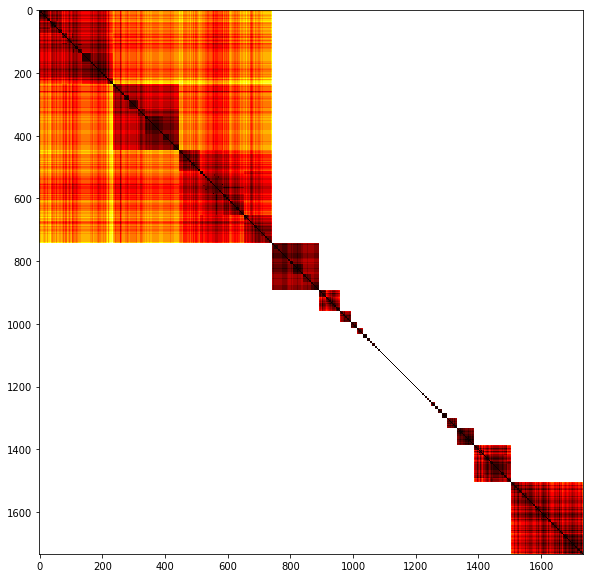

In [21]:
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(distance_optimal, cmap='hot', interpolation='nearest')
plt.show()

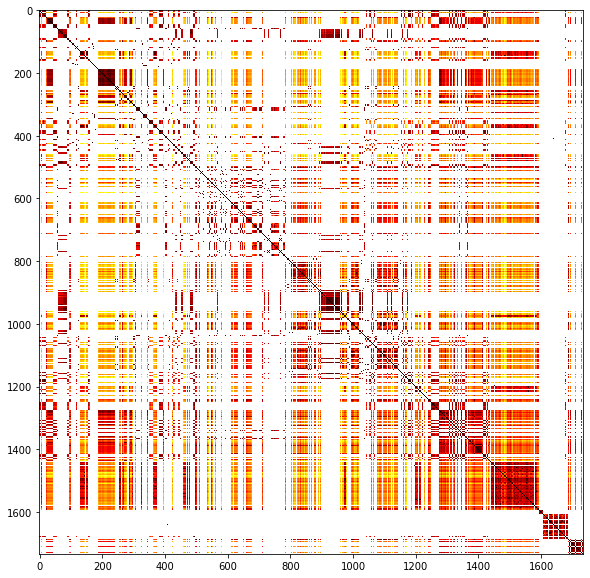

In [17]:
matrix1 = matrix.copy()
for i in range(n):
    for j in range(i):
        if matrix1[i][j] == 0:
            matrix1[i][j] = max_val
            matrix1[j][i] = max_val
        
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(matrix1, cmap='hot', interpolation='nearest')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 1734/1734 [00:31<00:00, 55.89it/s]


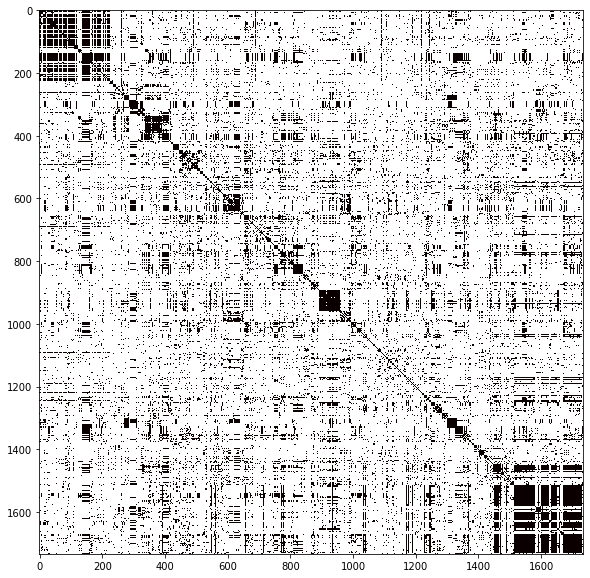

In [18]:
word_sim = np.zeros(shape = (n,n))
for i in tqdm(range(0,n)):
    for j in range(i+1):
        i_words = definitions[optimal_order[i]].split()
        i_words = [w for w in i_words if w not in stop_words]
        j_words = definitions[optimal_order[j]].split()
        j_words = [w for w in j_words if w not in stop_words]
        intersection = len(set(i_words).intersection(set(j_words)))
        union = len(set(i_words).union(set(j_words)))
        jaccard_dist = 1- (intersection/union)
        if jaccard_dist != 1: jaccard_dist = 0
        elif jaccard_dist == 1: jaccard_dist = 1
        word_sim[i][j] = jaccard_dist
        word_sim[j][i] = jaccard_dist
        
plt.imshow(word_sim, cmap='hot', interpolation='nearest')
plt.show()

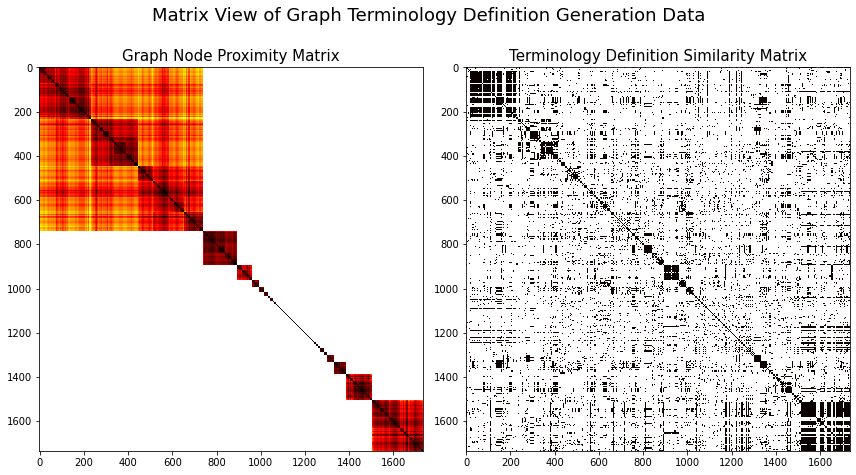

In [53]:
plt.subplot(1,2,1)
plt.imshow(distance_optimal, cmap='hot', interpolation='nearest')
plt.title("Graph Node Proximity Matrix", size = 15)

plt.subplot(1,2,2)
plt.imshow(word_sim, cmap='hot', interpolation='nearest')
plt.title("Terminology Definition Similarity Matrix", size = 15)
 
plt.suptitle("Matrix View of Graph Terminology Definition Generation Data", size = 18, x = 0.6)
plt.tight_layout(rect=[0, 0, 1.2, 1.3])
plt.show()

## Performance visualization

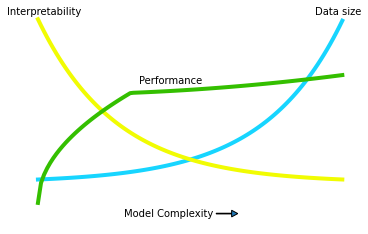

In [2]:
import matplotlib.pyplot as plt


x = [i for i in range(100)]
y = [5*(1.04**i) +50 for i in x]
z = [245*(1.04**(-1*i)) +50  for i in x]
m = [30*i**(1/2) + 20 if i <= 30 else 182 + 0.003*(i**2) for i in x]

plt.plot(x, y, color = "#17D5FF", linewidth = 4)
plt.plot(x,z, color = "#F1FC02", linewidth = 4)
plt.plot(x,m, color = "#34BF00", linewidth = 4)
plt.axis("off")
plt.text(28,0,'Model Complexity', size = 10)
plt.arrow(58, 4, 5, 0, width = 1, shape = "full", head_width = 10, head_length = 2) 
plt.text(33,199, "Performance")
plt.text(-10, 302, "Interpretability")
plt.text(90, 302, "Data size")
plt.show()